# Demo on Association Rules with R and Jupyter

First we will install packages arules and arulesViz. 
Note the installation may take a while.

In [10]:
install.packages("arules", rep="http://lib.stat.cmu.edu/R/CRAN/")
install.packages("arulesViz", rep="http://lib.stat.cmu.edu/R/CRAN/")


The downloaded source packages are in
	‘/private/var/folders/zm/79bb4c_j6n9_kg23gyhb89hnyhx5dc/T/RtmpxwLbIi/downloaded_packages’


also installing the dependencies ‘gdata’, ‘pkgmaker’, ‘rngtools’, ‘gridBase’, ‘doParallel’, ‘lmtest’, ‘TSP’, ‘gclus’, ‘gplots’, ‘registry’, ‘NMF’, ‘irlba’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’




The downloaded source packages are in
	‘/private/var/folders/zm/79bb4c_j6n9_kg23gyhb89hnyhx5dc/T/RtmpxwLbIi/downloaded_packages’


In [15]:
library('arules')
library('arulesViz')

In [12]:
data(Groceries)
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

The Groceries dataset contains 9835 transactions and 169 grocery items.
Display a summary below.

In [13]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meet and sausage
2     sausage sausage meet and sausage
3  live

In [14]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [16]:
# display the first 20 grocery labels
Groceries@itemInfo[1:20,]

,labels,level2,level1
1,frankfurter,sausage,meet and sausage
2,sausage,sausage,meet and sausage
3,liver loaf,sausage,meet and sausage
4,ham,sausage,meet and sausage
5,meat,sausage,meet and sausage
6,finished products,sausage,meet and sausage
7,organic sausage,sausage,meet and sausage
8,chicken,poultry,meet and sausage
9,turkey,poultry,meet and sausage
10,pork,pork,meet and sausage


In [17]:
# display the 10th to 20th transactions
apply(Groceries@data[,10:20], 2, 
      function(r) paste(Groceries@itemInfo[r,"labels"], collapse=", ")
)

[1] "whole milk, cereals"                                                                         
 [2] "tropical fruit, other vegetables, white bread, bottled water, chocolate"                     
 [3] "citrus fruit, tropical fruit, whole milk, butter, curd, yogurt, flour, bottled water, dishes"
 [4] "beef"                                                                                        
 [5] "frankfurter, rolls/buns, soda"                                                               
 [6] "chicken, tropical fruit"                                                                     
 [7] "butter, sugar, fruit/vegetable juice, newspapers"                                            
 [8] "fruit/vegetable juice"                                                                       
 [9] "packaged fruit/vegetables"                                                                   
[10] "chocolate"                                                                                   
[11] "specialty bar"

Next, let's generate some rules from the grocery dataset.

In [18]:
rules <- apriori(Groceries, parameter=list(support=0.001,
                                           confidence=0.6, target = "rules"))


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.6    0.1    1 none FALSE            TRUE   0.001      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [2918 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [19]:
summary(rules)

set of 2918 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6 
   3  490 1765  626   34 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   4.000   4.068   4.000   6.000 

summary of quality measures:
    support           confidence          lift       
 Min.   :0.001017   Min.   :0.6000   Min.   : 2.348  
 1st Qu.:0.001118   1st Qu.:0.6316   1st Qu.: 2.668  
 Median :0.001220   Median :0.6818   Median : 3.168  
 Mean   :0.001480   Mean   :0.7028   Mean   : 3.450  
 3rd Qu.:0.001525   3rd Qu.:0.7500   3rd Qu.: 3.692  
 Max.   :0.009354   Max.   :1.0000   Max.   :18.996  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.001        0.6

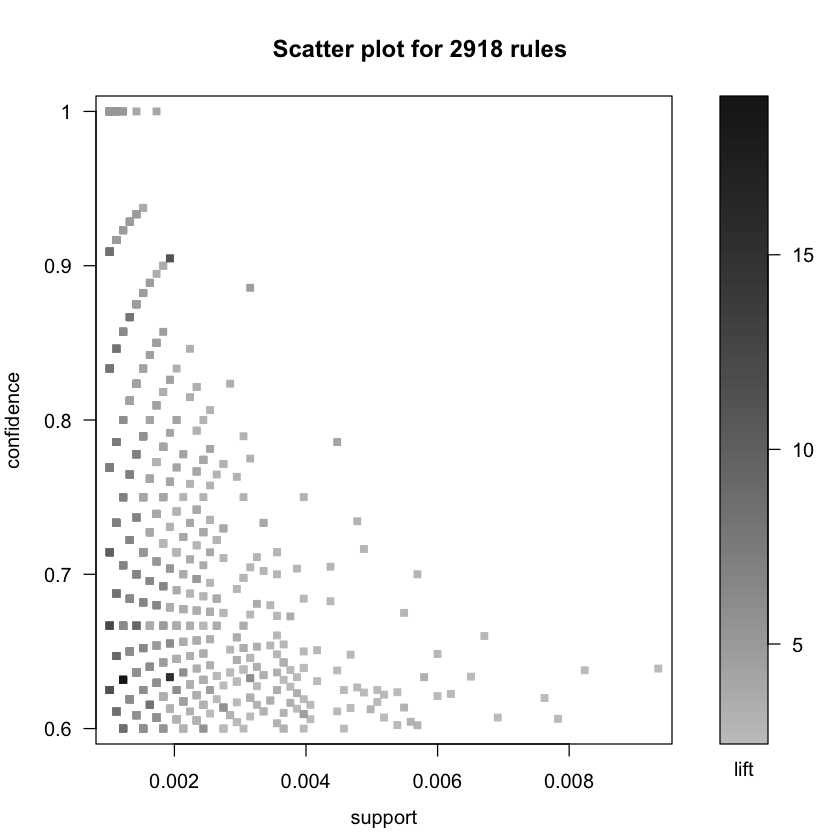

In [20]:
plot(rules)

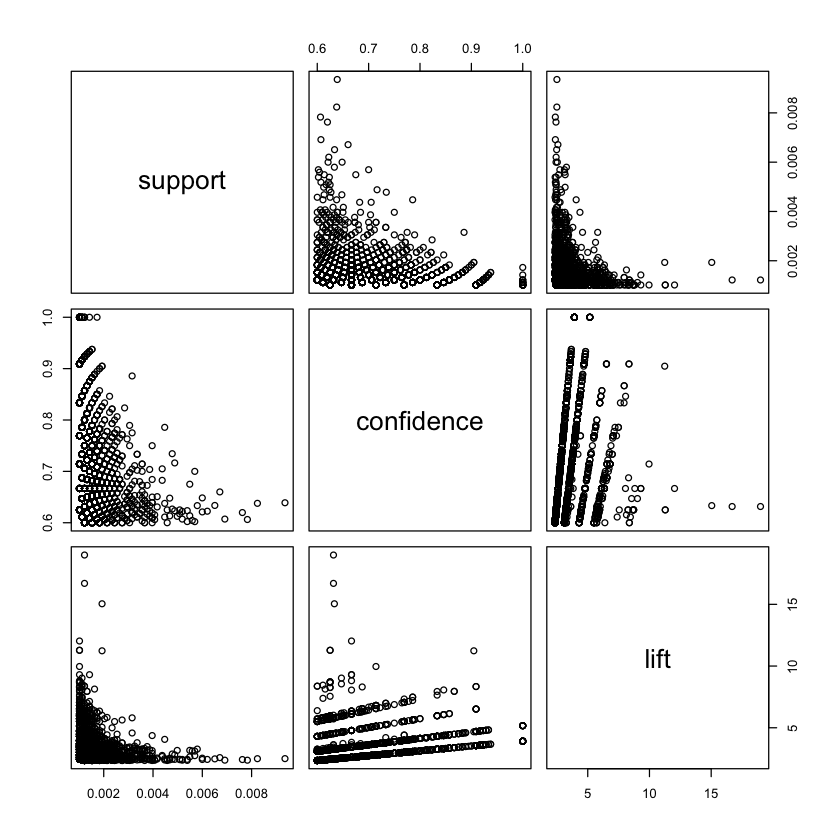

In [21]:
plot(rules@quality)

In [22]:
confidentRules <- rules[quality(rules)$confidence > 0.9]
confidentRules

set of 127 rules 

Itemsets in Antecedent (LHS)
  [1] "{citrus fruit,other vegetables,soda,fruit/vegetable juice}"          
  [2] "{tropical fruit,other vegetables,whole milk,yogurt,oil}"             
  [3] "{tropical fruit,whipped/sour cream,fruit/vegetable juice}"           
  [4] "{tropical fruit,whole milk,whipped/sour cream,fruit/vegetable juice}"
  [5] "{whole milk,butter,whipped/sour cream,soda}"                         
  [6] "{root vegetables,onions,napkins}"                                    
  [7] "{hamburger meat,tropical fruit,whipped/sour cream}"                  
  [8] "{root vegetables,whole milk,butter,white bread}"                     
  [9] "{tropical fruit,butter,yogurt,white bread}"                          
 [10] "{yogurt,oil,coffee}"                                                 
 [11] "{citrus fruit,root vegetables,whole milk,yogurt,whipped/sour cream}" 
 [12] "{pork,whole milk,butter milk}"                                       
 [13] "{tropical fruit,whipped/sour cream,hard 

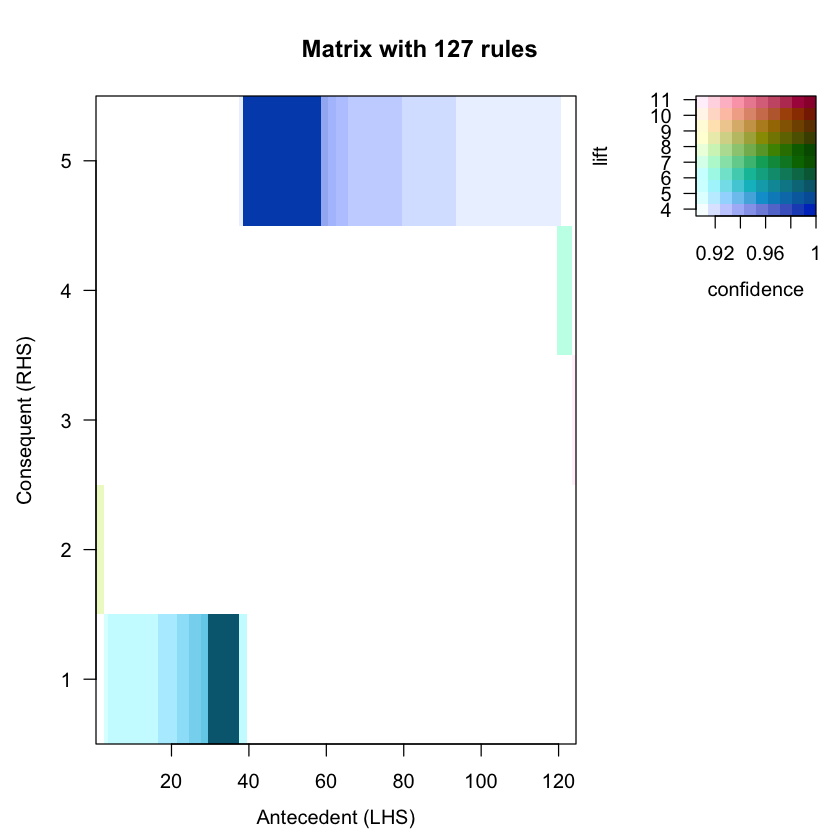

In [23]:
plot(confidentRules, method="matrix", measure=c("lift", "confidence"),
     control=list(reorder=TRUE))

In [24]:
# select the 5 rules with the highest lift
highLiftRules <- head(sort(rules, by="lift"), 5)

In [26]:
highLiftRules

set of 5 rules 

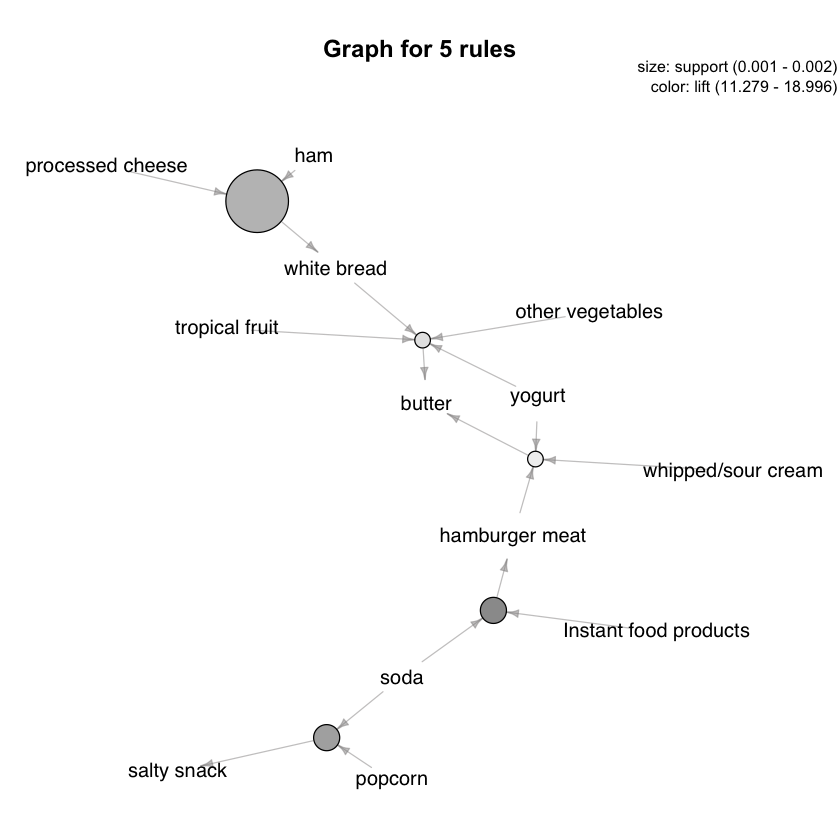

In [27]:
plot(highLiftRules, method="graph", control=list(type="items"))